In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
%matplotlib inline
import librosa
import os
import h5py

### CODE 15%

In [34]:
f = h5py.File(r'E:\Arrythmia\Data\CODE-15% a large scale annotated dataset of 12-lead ECGs\exams_part0\exams_part0.hdf5', 'r')
print(f.keys())
print(f['exam_id'][0], f['tracings'][0].shape)
# print number of entries
print(len(f['tracings']))

<KeysViewHDF5 ['exam_id', 'tracings']>
590673 (4096, 12)
20001


In [36]:
# Print the index where exam_id = 884804
print(np.where(f['exam_id'][:] == 884804)) 

(array([19940], dtype=int64),)


(4096, 12) -3.1552458 2.7535748
(4096, 12) 0.0 1.0


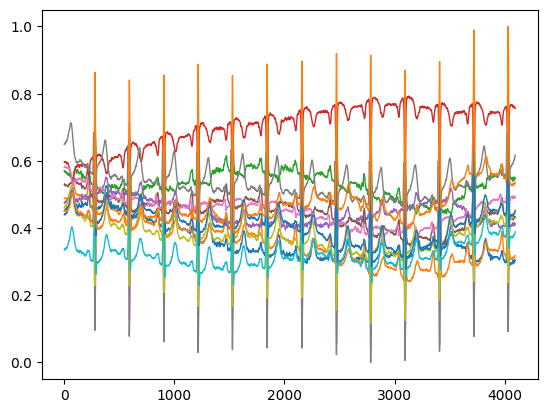

In [3]:
x = np.array(f['tracings'][0])[:, :]
print(x.shape,x.min(),x.max())

def normalize(x):

    return (x - x.min()) / (x.max() - x.min())

x = normalize(x)
plt.plot(x,lw = 1);
print(x.shape,x.min(),x.max())


e:\Arrythmia\Arrhythmia_env\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=12
  warnings.warn(
e:\Arrythmia\Arrhythmia_env\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(4096, 1025)


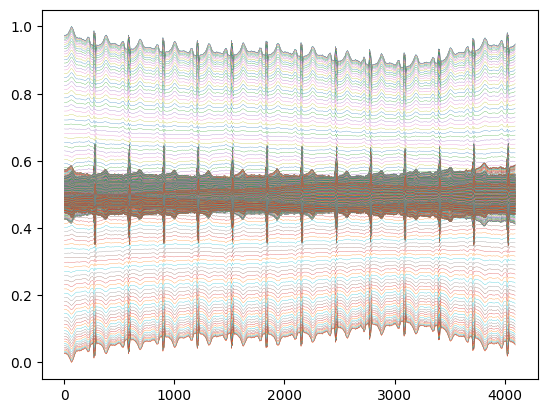

In [4]:
zz = np.array(librosa.stft(x,n_fft = 2048))[:,:,0]
#plot mel spectogram using librosa
zz = normalize(zz)
plt.plot(zz, lw=.2);
print(zz.shape)
# plt.plot(np.array(tf.signal.stft(x, frame_length=256, frame_step=128))[0,:,:]);

e:\Arrythmia\Arrhythmia_env\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=12
  warnings.warn(


(4096, 128, 1) (4096, 5)


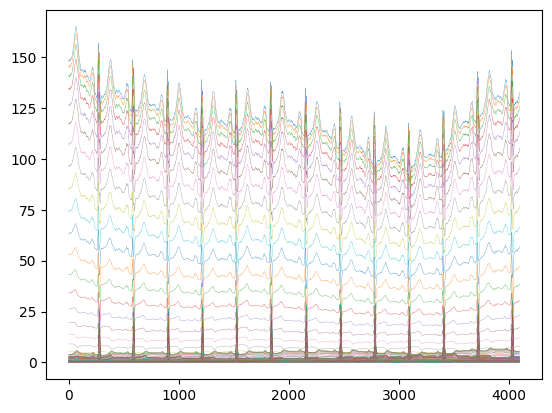

In [5]:
zzz = np.array(librosa.feature.melspectrogram(y = x, sr = 500))
print(zzz.shape,x[:,1:6].shape)
plt.plot(zzz[:,:,0], lw=0.2);

In [1]:
# y = np.array(f['tracings'][0])[:, 12]
# plt.plot(y,lw = 1);
#increase the size of the plot
# for j in range(10):

plt.figure(figsize=(20,20))

for i in range(0,12):
    y = np.array(f['tracings'][j])[:, i]
    y = normalize(y)
    plt.suptitle(f"{f['exam_id'][j]} _ {j}")
    plt.subplot(12,1,i+1)
    plt.plot(y,lw = 1);
#save as pdf
    # plt.savefig(f'E:\Arrythmia\sample code15\{j}.pdf', dpi=300,format='pdf', bbox_inches='tight')


NameError: name 'plt' is not defined